# Linear Model

## Seaborn

Python에서 많이 쓰이는 시각화 라이브러리. http://seaborn.pydata.org/

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import matplotlib as plt

In [2]:
cars = pd.read_csv('automobile.csv')
cars.head()

,symboling,normalized_losses,maker,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [3]:
cars.columns

Index(['symboling', 'normalized_losses', 'maker', 'fuel', 'aspiration',
       'doors', 'body', 'wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

### Regression Plot

In [4]:
# 노트북에 표시되는 plot 크기 조절

In [5]:
fig = plt.pyplot.gcf()
fig.set_size_inches(16, 10)

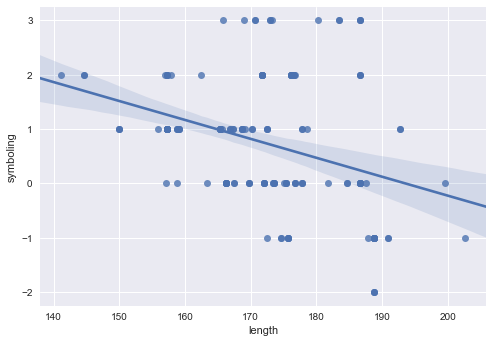

In [6]:
sb.regplot(cars.length, cars.symboling)

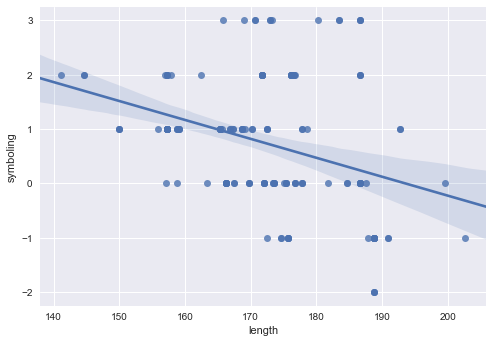

In [7]:
sb.regplot('length', 'symboling', data=cars)

In [8]:
# 회귀선 지우기

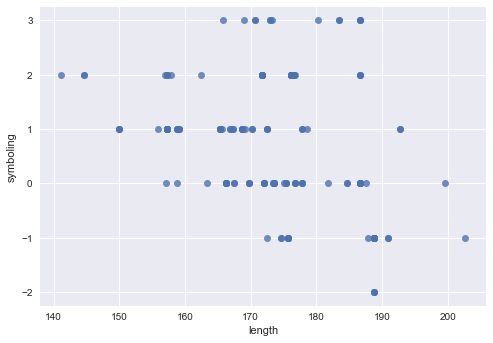

In [9]:
sb.regplot('length', 'symboling', data=cars, fit_reg=False)

In [10]:
# jitter

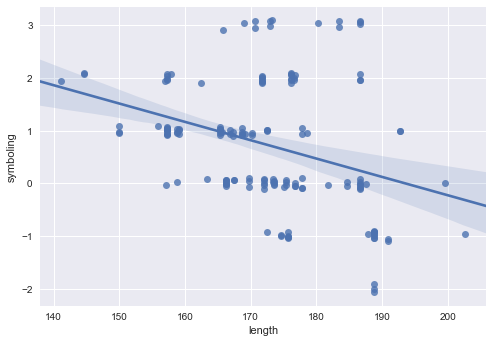

In [11]:
sb.regplot('length', 'symboling', data=cars, y_jitter=0.1)

In [12]:
# 신뢰구간(ci) 지우기. 회귀선 색상. 점 색상.

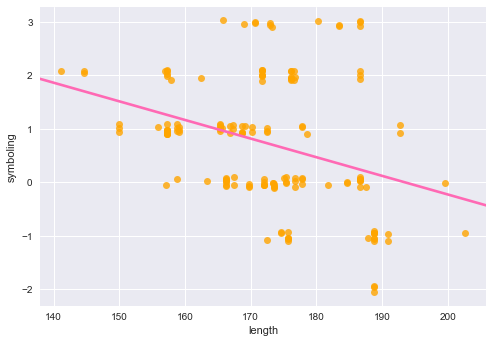

In [13]:
sb.regplot('length', 'symboling', data=cars, y_jitter=0.1, ci=None, 
           line_kws={'color': 'hotpink'}, 
           scatter_kws={'color': 'orange'})   # 16진수('FF9900')로 색상 지정 가능.

In [14]:
# 점 모양과 크기

http://matplotlib.org/api/markers_api.html#module-matplotlib.markers

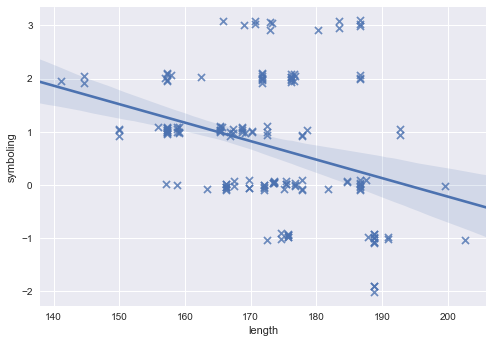

In [15]:
sb.regplot('length', 'symboling', data=cars, y_jitter=0.1, marker='x', scatter_kws={'s': 50})

In [16]:
# save plot

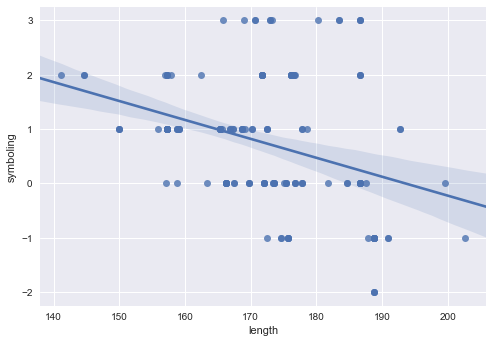

In [17]:
plot = sb.regplot('length', 'symboling', data=cars)
plot.get_figure().savefig('plot.png')

# statsmodels

Python에서 통계 분석을 위한 라이브러리. http://statsmodels.sourceforge.net/

In [18]:
import statsmodels.formula.api as smf

In [19]:
model = smf.ols('symboling ~ length', data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              symboling   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     20.01
Date:                Sat, 25 Mar 2017   Prob (F-statistic):           1.47e-05
Time:                        10:47:16   Log-Likelihood:                -243.64
No. Observations:                 159   AIC:                             491.3
Df Residuals:                     157   BIC:                             497.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7385      1.345      5.011      0.000         4.082     9.395
length        -0.0348      0.008     -4.474      0.000        -0.050    -0.019
==============================================================================
Omnibus:                       10.632   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.510
Skew:                           0.658   Prob(JB):                      0.00317
Kurtosis:                       2.915   Cond. No.                     2.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model = smf.ols('symboling ~ length + price', data=cars).fit().summary()

In [21]:
# smf.ols('symboling ~ .', data=cont_data).fit().summary()   # ~ 다음에 '.' 인식 안됨

#### 연속형 / 범주형 변수 구분

In [22]:
cars.columns

Index(['symboling', 'normalized_losses', 'maker', 'fuel', 'aspiration',
       'doors', 'body', 'wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [23]:
cont_var = cars.columns[cars.dtypes != 'object']
cont_var

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [24]:
cate_var = cars.columns[cars.dtypes == 'object']
cate_var

Index(['maker', 'fuel', 'aspiration', 'doors', 'body', 'wheels',
       'engine_location', 'engine_type', 'cylinders', 'fuel_system'],
      dtype='object')

In [25]:
cars[cate_var].head()

,maker,fuel,aspiration,doors,body,wheels,engine_location,engine_type,cylinders,fuel_system
0,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
1,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
3,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
4,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi


#### 연속형 변수들만 사용 (범주형 변수 제외)

In [26]:
indep = ' + '.join(cont_var.difference(['symboling']))   # symboling 제외
indep

'bore + city_mpg + compression_ratio + curb_weight + engine_size + height + highway_mpg + horsepower + length + normalized_losses + peak_rpm + price + stroke + wheel_base + width'

In [27]:
smf.ols('symboling ~ ' + indep, data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              symboling   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     13.89
Date:                Sat, 25 Mar 2017   Prob (F-statistic):           3.68e-21
Time:                        10:47:16   Log-Likelihood:                -181.72
No. Observations:                 159   AIC:                             395.4
Df Residuals:                     143   BIC:                             444.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             3.3079      5.583      0.592      0.554        -7.728    14.344
bore                 -0.1778      0.368     -0.484      0.629        -0.905     0.549
city_mpg             -0.1086      0.052     -2.072      0.040        -0.212    -0.005
compression_ratio     0.0456      0.026      1.741      0.084        -0.006     0.097
curb_weight          -0.0007      0.001     -1.179      0.241        -0.002     0.000
engine_size           0.0030      0.006      0.471      0.638        -0.010     0.016
height                0.0492      0.046      1.068      0.287        -0.042     0.140
highway_mpg           0.0847      0.047      1.800      0.074        -0.008     0.178
horsepower            0.0054      0.006      0.966      0.336        -0.006     0.017
length                0.0050      0.016      0.310      0.757        -0.027     0.037
normalized_losses     0.0140      0.002      6.236      0.000         0.010     0.018
peak_rpm             -0.0001      0.000     -0.757      0.450        -0.001     0.000
price              8.963e-06    2.8e-05      0.320      0.750     -4.64e-05  6.44e-05
stroke               -0.0668      0.268     -0.249      0.803        -0.597     0.463
wheel_base           -0.2074      0.031     -6.669      0.000        -0.269    -0.146
width                 0.2207      0.081      2.716      0.007         0.060     0.381
==============================================================================
Omnibus:                        0.983   Durbin-Watson:                   1.035
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.833
Skew:                           0.177   Prob(JB):                        0.659
Kurtosis:                       3.013   Cond. No.                     1.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""